In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [412]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [6]:
import os

In [8]:
import mysql.connector

In [10]:
import pandas as pd

In [12]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('geolocation.csv', 'geolocation'),
    ('order_items.csv', 'order_items'),
    ('orders.csv', 'orders'),
    ('payments.csv', 'payments'),
    ('products.csv', 'products'), 
    ('sellers.csv', 'sellers')
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Prasanthi@10',
    database='E_Commerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'ECommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing geolocation.csv
NaN values before replacement:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Processing order_items.csv
NaN values before replacement:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered

### Que1 List all Unique cities where customers are located.

In [14]:
import pandas as pd

In [16]:
import numpy as np

In [18]:
import matplotlib.pyplot as plt

In [20]:
import seaborn as sns

In [22]:
import mysql.connector

In [24]:
import numpy as mp

In [28]:
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Prasanthi@10',
    database='E_Commerce'
)
cursor = conn.cursor()       #activating the cursor 

In [30]:
query = "select DISTINCT customer_city FROM Customers"
cursor.execute(query)     #Executing the above query
data = cursor.fetchall()  #fetches all data
df = pd.DataFrame(data)   
df

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
4114,siriji
4115,natividade da serra
4116,monte bonito
4117,sao rafael


### Que2 Count the number of orders placed in 2017

In [32]:
query = "SELECT COUNT(order_ID) FROM orders WHERE (order_purchase_timestamp) = 2017"
cursor.execute(query)
data = cursor.fetchall()
"total orders placed in 2017 are", data[0][0] 

('total orders placed in 2017 are', 135303)

### Que3 Find total sales per category

In [34]:
#round() is used to reduce decimal values
query = "SELECT Upper(products.product_category), round(sum(payments.payment_value),2) FROM products JOIN order_Items on products.product_ID = order_items.product_id  JOIN payments on payments.order_id = order_items.order_ID group by product_category;"
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["Category", "Sales"])
df

,Category,Sales
0,PERFUMERY,13681943.82
1,FURNITURE DECORATION,38614762.58
2,TELEPHONY,13145815.37
3,BED TABLE BATH,46238949.12
4,AUTOMOTIVE,23011946.94
...,...,...
69,CDS MUSIC DVDS,32384.61
70,LA CUISINE,78665.31
71,FASHION CHILDREN'S CLOTHING,21213.09
72,PC GAMER,58709.61


### Que4 Calculate the percentage of orders that were paid in installment

In [35]:
query = "SELECT sum(case when payment_installments >= 1 then 1 else 0 end)/count(*)*100 from payments;"
cursor.execute(query)
data = cursor.fetchall()
"the percentage of orders that were paid in installments is", data[0][0]

('the percentage of orders that were paid in installments is',
 Decimal('99.9981'))

### Que5 Count number of customers in each state 

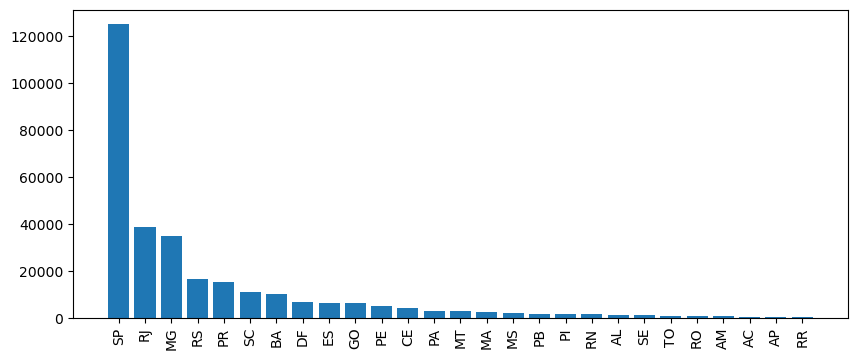

In [36]:
query = "SELECT customer_state,  count(customer_ID) from customers group by customer_state;"
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["state", "customer_count"])
df
df = df.sort_values(by = "customer_count", ascending = False)


plt.figure(figsize = (10,4))
plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation = 90)
plt.show()

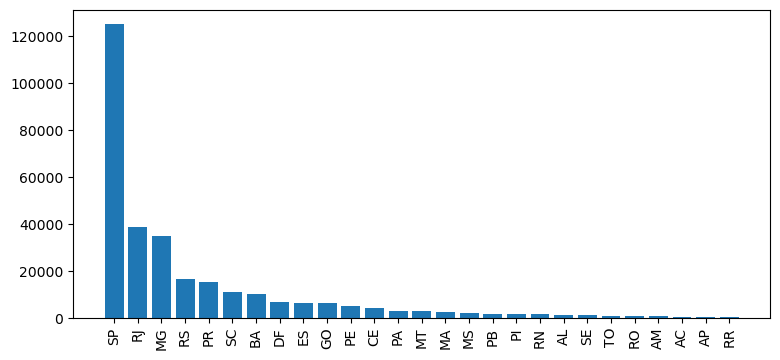

In [57]:
df = pd.DataFrame (data, columns = ["state", "customer_count"])
df = df.sort_values(by = "customer_count", ascending = False)


plt.figure(figsize = (9, 4))   #adjusts the size of the chart
plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation = 90)   #to rotate x-axis 
plt.show()

### Que6 Calcuate no.of orders per month in 2018 

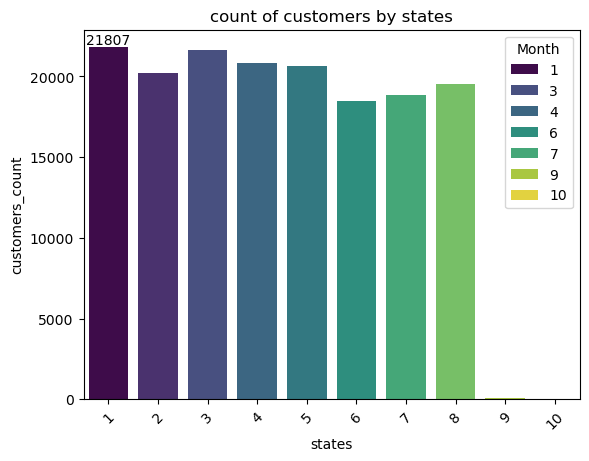

In [59]:
query = "SELECT month(order_purchase_timestamp) months, count(order_ID) order_count from orders where year(order_purchase_timestamp) = 2018 group by months;"
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["Month", "Order_Count"])
df


o = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]


ax = sns.barplot(x = df["Month"], y = df["Order_Count"], data = df , order = o, hue = df["Month"] , palette = "viridis")
                                                                                # simply we can give a color = "red"
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.xlabel("states")
plt.ylabel("customers_count")
plt.title("count of customers by states")
plt.show()

### Que7 Find average no.of products per order grouped by customer city 

In [70]:
query = "with count_per_order as (SELECT orders.order_id, orders.customer_id, count(order_items.order_id) as oc from orders join order_items on orders.order_id = order_items.order_id  group by orders.order_id, orders.customer_id)select customers.customer_city, avg(count_per_order.oc) as average_count  from customers join count_per_order on customers.customer_id = count_per_order.customer_id group by customers.customer_city"
cursor.execute(query)
data = cursor.fetchall()
data

df = pd.DataFrame(data, columns = ["customer city", "average products/orders"])
df.head(10)

,customer city,average products/orders
0,sao paulo,10.4059
1,sao jose dos campos,10.2464
2,porto alegre,10.5743
3,indaial,10.0385
4,treze tilias,11.4545
5,rio de janeiro,10.3209
6,mario campos,12.0000
7,guariba,9.0000
8,cuiaba,10.7782
9,franca,11.2642


### Que8 Calculate the percentage of total revenue contributed by each product category

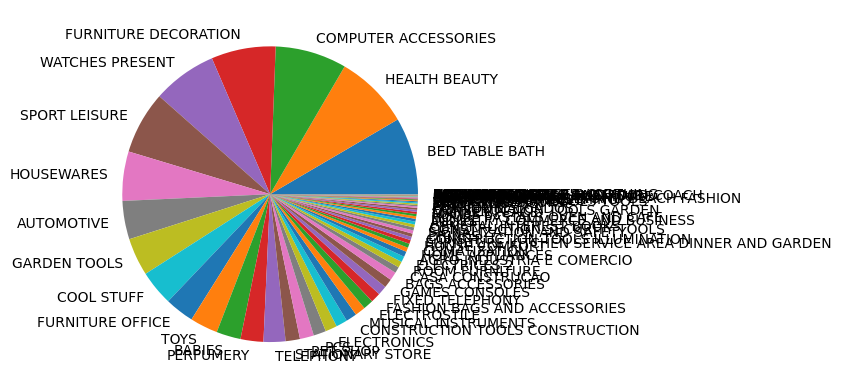

In [71]:
query = "SELECT upper(products.product_category) category, round(sum(payments.payment_value)/ (select sum(payment_value) from payments)*100,2) sales_percentage from products join order_items on products.product_id = order_items.product_id join payments on payments.order_id = order_items.order_id group by category order by sales_percentage desc;"
cursor.execute(query) 
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["Category", "% distribution"])
df.head()


#To show the percentage distribution 
plt.pie(df["% distribution"], labels = df["Category"])
plt.show()

### Que9 Identify the "correlation" between product price & the number of times a product has been purchased

In [74]:
query = "select products.product_category, count(order_items.product_id),round(avg(order_items.price),2) from products join order_items on products.product_id = order_items.product_id group by products.product_category"
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["Category", "Order_count", "Price"])
df

#numpy 
arr1 = df["Order_count"]
arr2 = df["Price"]

a = np.corrcoef([arr1,arr2])   
print("the correlation between price & number of times a product has been purchased", a[0][1])


the correlation between price & number of times a product has been purchased -0.10631514167157556


### Que10  Calculate the total revenue generated by each seller & rank them by revenue 

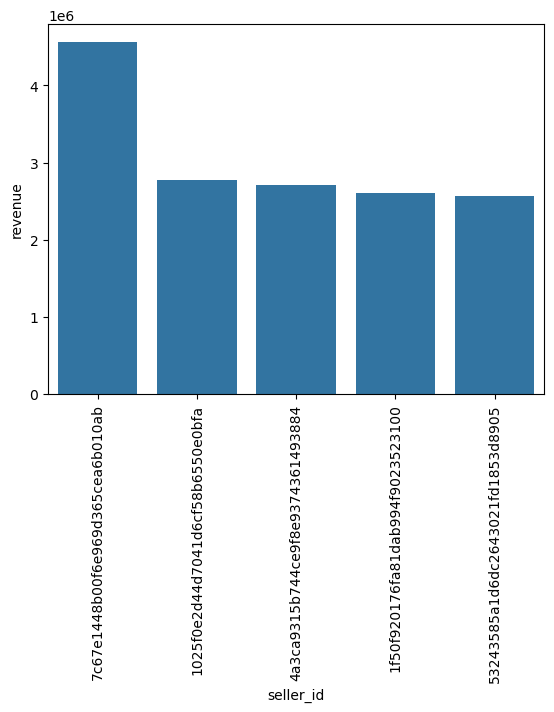

In [76]:
query = "select *, dense_rank() over(order by revenue desc) as rn from (select order_items.seller_id, sum(payment_value) revenue from order_items join payments on order_items.order_id = payments.order_id group by order_items.seller_id) as a"
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["seller_id", "revenue", "rank"])
df = df.head()


sns.barplot(x = "seller_id", y = "revenue", data = df) 
plt.xticks(rotation = 90)
plt.show()

## Advanced Queries
### Que11 Calculate the moving average of order values of each customer on their order_history

In [78]:
query = "select customer_id, order_purchase_timestamp, payment, avg(payment) over (partition by customer_id order by order_purchase_timestamp rows between 2 preceding and current row) as mov_avg from  (select orders.customer_id, orders.order_purchase_timestamp, payments.payment_value as payment from payments join orders on payments.order_id = orders.order_id) as a;"
cursor.execute(query) 
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["order_id", "time_stamp","Price", "Moving_average"])
df

,order_id,time_stamp,Price,Moving_average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
...,...,...,...,...
934969,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
934970,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
934971,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
934972,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


### Que12 Calculate the cumulative sales per month for each year

In [80]:
query = "select years, months, payment, sum(payment) over(order by years, months) cumulative_sales from (select year(orders.order_purchase_timestamp) as years,  month(orders.order_purchase_timestamp) as months,  round(sum(payments.payment_value),2) as payment from orders join payments on  orders.order_id = payments.order_id group by years, months order by years, months) as a;"
cursor.execute(query)
data  = cursor.fetchall()
df = pd.DataFrame(data, columns = ["Year", "Month", "sales", "Price"])
df

,Year,Month,sales,Price
0,2016,9,2270.16,2.270160e+03
1,2016,10,531814.32,5.340845e+05
2,2016,12,176.58,5.342611e+05
3,2017,1,1246392.36,1.780653e+06
4,2017,2,2627172.09,4.407826e+06
5,2017,3,4048772.40,8.456598e+06
6,2017,4,3760092.27,1.221669e+07
7,2017,5,5336269.38,1.755296e+07
8,2017,6,4601487.42,2.215445e+07
9,2017,7,5331446.28,2.748589e+07


### Que13 Calculate the year-over-year growth rate of total sales.

In [82]:
query = """with a as (select year(orders.order_purchase_timestamp) as years, round(sum(payments.payment_value),2) 
            as payment from orders join payments on  
            orders.order_id = payments.order_id group by years 
            order by years)
    select years, payment, lag(payment, 1) over(order by years) from a"""
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["Years", "Sales", "Previous_Year"])
df

,Years,Sales,Previous_Year
0,2016,534261.06,NaN
1,2017,65247720.55,534261.06
2,2018,78297867.47,65247720.55
